# <div dir=rtl> TA 8 - Dimensionality Reduction + Intro to Unsupervised learning  </div>


------------

## <div dir=rtl>Dimensionality Reduction</div>

<div dir=rtl>
היום נדבר על Dimensionality reduction - העתקה של הדאטא שלי מהמימד המקורי הגבוה שלה (כמות הפיצ'רים) למימד נמוך יותר, בלי לאבד יותר מידי תכונות משמעותיות מהדאטא המקורי. 
</br>
פעמים רבות הדאטא שלנו יהיה ממימד גבוה מידי, ונתקשה לעבוד איתו - בין אם מבחינת יכולת חישוב, יכולת ויזואליזציה, overfitting, פיצ'רים מיותרים ועוד
</br>
במילים אחרות - נרצה "לסכם" את הדאטא שלנו ולשמור ממנו רק את מה שבאמת חשוב.
</br>
בהרצאה הכרנו שתי שיטות לכך - PCA וtSNE.
</div>

### <div dir=rtl> PCA </div>

<div dir=rtl>
PCA, או Principal Component analysis היא שיטה לינארית להורדת מימד בה אנחנו מבצעים איזושהי העתקה לינארית למערכת קורדינאטות חדשה בה כל ציר הוא (לרוב) אינו פיצ'ר מקורי של הדאטא, אלא מעין "פיצ'ר חדש" (Principal Component) שמסכם בצורה הכי טובה שניתן את השינויים המשמעותיים בדאטא.
</br>
הPCים השונים יבנו בצורה שתדאג שהטלה עליהם תשמר כמה שיותר variance בדאטא ו"תתעלם" מפיצ'רים פחות תורמים.
</div>

<div dir=rtl>
כפי שראינו (מתמטית) בהרצאה, בPCA אנחנו עונים של שתי מטרות "זהות": 
</br>
1. Maximizing the projected variance - מציאת הכיוון בו הדאטא כמה שיותר פרוס (Variance גבוה), כדי לשמור כמה שיותר אינפורמציה על הדאטא
</br>
2. Minimizing the projection residuals - חיפוש הPCים המקיימים שסכום ריבועי המרחקים (reconstruction error) בין הדאטא המקורי להטלות שלהם על הPCים הוא הקטן ביותר, כדי שנוכל במידת הצורך "להטיל" אותם חזרה למימד המקורית בפשטות.

![alt text](PCA_Goals.png)

</div>

<div dir=rtl>
הסבר יותר אינטואטיבי ללמה שתי מטרות אלו זהות הוא גיאומטרי - נסתכל על המשולש שנוצר ע"י הטלה של נקודה על הPC. נשים לב שבגלל משפט פיתגורס מזעור המרחק לPC זהה למקסום הspread (variance) וההפך.
</br>
באנימציה נוכל לראות איך שינוי של הPC יגדיל/יקטין את מרחק ההטלה ובהתאם לכך יקטין/יגדיל את הspread.
</br>
(Animation from - "https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues" Which is highly recommened reading for understanding and intuition!!)
</br>
</br>
</div>

<div style="display: flex; align-items: center;">
    <img src="PCA_Goals_relation.gif" alt="PCA Goals Animation" style="width: 45%; margin-right: 10px;">
    <img src="PCA_Goals_equivalence.png" alt="PCA Goals Equivalence" style="width: 45%;">
</div>

<div dir=rtl>
בפועל, אותם הPCים הם הוקטורים העצמיים של מטריצת הcovariance של הדאטא שלנו, המסודרים על פי גודל הערך העצמי.
</br>
כך, אנחנו מקבלים שהPC הראשון שלנו תואם לכיוון הvariance המקסימלי בדאטא שלנו, הPC השני (שאורתוגונלי לראשון - למה?) תופס את הvariance הגדול ביותר הבא וכו וכו

![alt text](PCA_PCs.png)

</div>

### <div dir=rtl> tSNE </div>

<div dir=rtl>
tSNE, או t-distributed Stochastic Neighbor Embedding היא שיטה *לא-לינארית* להורדת מימדים המשמשת לויזואליזציה של דאטא ממימד גבוה, למציאת קלאסטרים ומבנים לא לינאריים אחרים שהטלות פשוטות לא יכולות למצוא.
</br>
tSNE לוקחת נקודות ממימד גבוה מסוים ומעבירה אותן למימד נמוך יותר, תוך שמירה על שכנויות בין הנקודות (במימד המקורי) והפרדה משמעותית מספיק בין לא-שכנים.
</br>
זה נעשה באמצעות המרה של מרחקים בין כל זוג נקודות להסתברות - כאשר שכנים יחזירו הסתברות גבוהה, ונקודות רחוקות יחזירו הסתברות נמוכה.
</br>
לאחר מכן, tSNE מנסה לחפש את ההטלות למימד החדש שממזערות את KL divergence - סט ההטלות שהפיזור שלהן (ההתפלגויות) כמה שיותר קרוב להתפלגויות של הדאטא המקורי. 
</br>
כדי למנוע "Crowding" - מחשבים לפי t-distribution במימד הנמוך יותר.
</div>

<div dir=rtl>
בהרצאה ראיתם דוגמא עבור דאטאסט MNIST בו קיימות לנו ספרות שונות בכתב יד, שם כל פיצ'ר הוא פיקסל. מדובר בהמון פיקסלים, ועל כן נרצה לסכם את הדאטא שלנו איכשהו - תוך שמירה על השנויות בו. ,
במה נשתמש?
</br>
במקרה של MNIST, הדאטא לא פריד לינארית
</div>

In [1]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
from sklearn.decomposition import PCA

Subset shape: (10000, 784), Labels shape: (10000,)


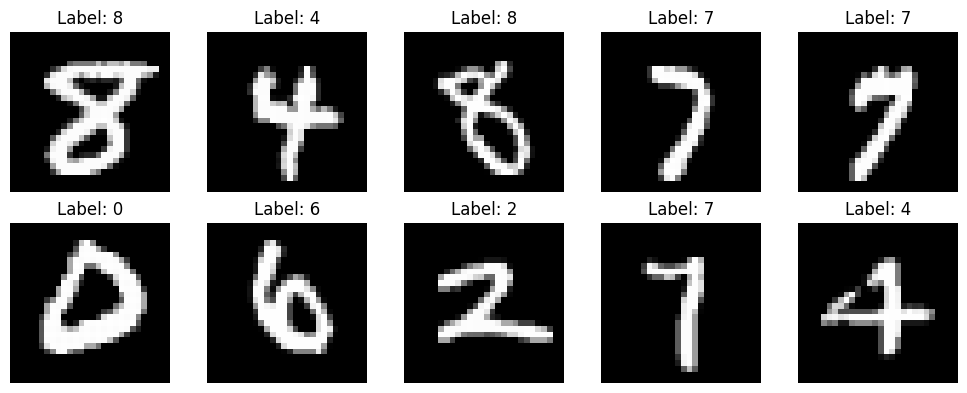

In [2]:
# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data / 255.0
y = mnist.target

# Select 10000 random points
np.random.seed(42)  # For reproducibility
indices = np.random.choice(range(X.shape[0]), size=10000, replace=False)
X_subset = X.iloc[indices]
y_subset = y.iloc[indices]

# print the shape of the subset
print(f"Subset shape: {X_subset.shape}, Labels shape: {y_subset.shape}")

# plot a few random images
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_subset.iloc[i].values.reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_subset.iloc[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()  

In [3]:
# Apply PCA for initial dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_subset)

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, max_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_subset)

c:\Users\ronmo\miniconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\ronmo\miniconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\ronmo\miniconda3\Lib\subprocess.py", line 550, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ronmo\miniconda3\Lib\subprocess.py", line 1028, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\ronmo\miniconda3\Lib\subprocess.py", line 1540, in _execute_child
    hp, ht, pid, tid = _winapi.Crea

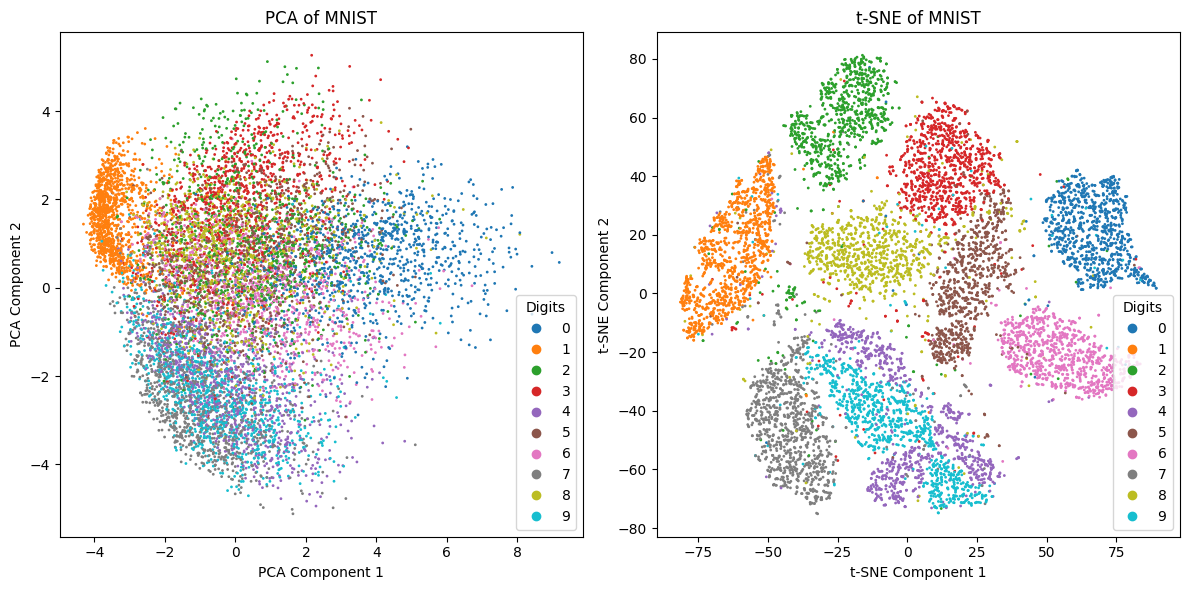

In [4]:
# plot a figure with PCA and t-SNE results

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# PCA plot
scatter1 = ax[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y_subset.astype(int), cmap='tab10', s=1)
ax[0].set_title('PCA of MNIST')
ax[0].set_xlabel('PCA Component 1')
ax[0].set_ylabel('PCA Component 2')
ax[0].legend(*scatter1.legend_elements(), title="Digits")

# t-SNE plot
scatter2 = ax[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_subset.astype(int), cmap='tab10', s=1)
ax[1].set_title('t-SNE of MNIST')
ax[1].set_xlabel('t-SNE Component 1')
ax[1].set_ylabel('t-SNE Component 2')
ax[1].legend(*scatter2.legend_elements(), title="Digits")


plt.tight_layout()
plt.show()

<div dir=rtl>
tSNE הצליח להבין את הדקויות הלא לינאריות בדאטא שלנו, ועל כן הצליח לבצע הטלות משמעותיות יותר
</div>

<div dir=rtl>
אבל רגע - בעצם הצלחנו לעשות פה עוד משהו, לא?
הצלחנו להפריד את הדאטא שלנו למחלקות שונות, כל אחת ב"קלאסטר" שונה!
</div>

## <div dir=rtl>Unsupervised learning</div>

<div dir=rtl>
עד כה דיברנו על צורת למידה (Supervised learning) בה אנחנו מקבלים דאטא מסוים, עם לייבלים (gt) ולפי זה ניסינו לבנות מודל שידע לחזות כמה שיותר טוב על סמך אותם הgtים.
</br>
עכשיו נדבר על צורת למידה אחרת - Unsupervised learning בה אנחנו מקבלים דאטא ללא הלייבלים שלו, וננסה לבצע "למידה" ע"י זיהוי תבניות או מבנים מסויימים בו.
</br>
כפי שכנראה ניחשתן - המשימות שלרוב למידה כזו תבצע הם הורדת מימד, קלאסטרינג וזיהוי תבניות או אנומליות.
</br>
אם תשימו לב - בקוד שביצענו מוקדם עבור PCA וtSNE - לא השתמשנו בלייבלים בשלב החישוב. על כן, את הקלאסטרינג ביצענו בלי לדעת מה החלוקה האמיתית.
</div>

## <div dir=rtl> שאלה 1 </div>

<div dir=rtl>
עכשיו נראה דוגמה אמיתית לשימוש ב Dimensionality reduction וclustering בסיסי בשביל לבנות מפה ביולוגית של אוכלוסיות תאים  (והקשר ביניהן) מדאטאסט של single-cell RNA-sequencing
</br>
Adjusted from - "https://scanpy.readthedocs.io/en/stable/tutorials/basics/clustering-2017.html#computing-the-neighborhood-graph"
</div>

In [5]:
# Uncomment the following lines to download data
# %mkdir -p data
# %curl https://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz -o data/pbmc3k_filtered_gene_bc_matrices.tar.gz
# %cd data
# !tar -xzf pbmc3k_filtered_gene_bc_matrices.tar.gz
# !mkdir -p write

In [6]:
%pip install scanpy igraph
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.


In [7]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor="white")

In [8]:
adata = sc.read_10x_mtx(
    "data/filtered_gene_bc_matrices/hg19/",  # the directory with the `.mtx` file
    var_names="gene_symbols",  # use gene symbols for the variable names (variables-axis index)
    cache=True,  # write a cache file for faster subsequent reading
)

... reading from cache file cache\data-filtered_gene_bc_matrices-hg19-matrix.h5ad


In [9]:
adata.var_names_make_unique()  # this is unnecessary if using `var_names='gene_ids'` in `sc.read_10x_mtx`
adata
# AnnData object is a special container designed to store large biological datasets. we have 2700 induvidual cells and 32738 genes (transcript count)

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

In [10]:
adata.var # metadata about the genes

gene_ids
MIR1302-10    ENSG00000243485
FAM138A       ENSG00000237613
OR4F5         ENSG00000186092
RP11-34P13.7  ENSG00000238009
RP11-34P13.8  ENSG00000239945
...                       ...
AC145205.1    ENSG00000215635
BAGE5         ENSG00000268590
CU459201.1    ENSG00000251180
AC002321.2    ENSG00000215616
AC002321.1    ENSG00000215611

[32738 rows x 1 columns]

## Preprocessing ##

normalizing counts per cell
    finished ({time_passed})


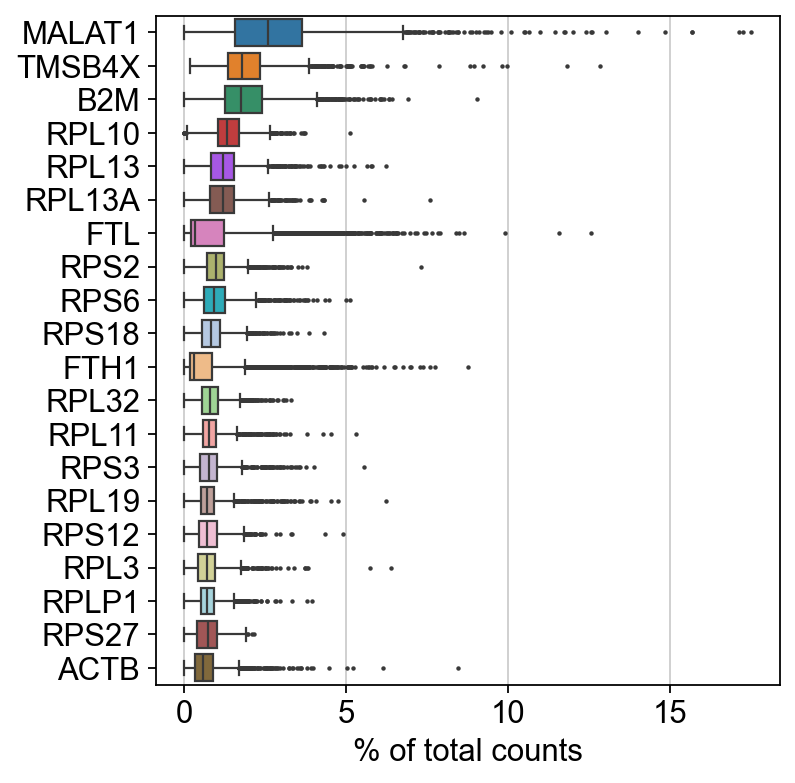

filtered out 19024 genes that are detected in less than 3 cells


In [11]:
sc.pl.highest_expr_genes(adata, n_top=20) # Show the genes that yield the highest fraction of counts in each single cell, across all cells.

# filter out cells that have fewer than 200 genes expressed and genes that are detected in fewer than 3 cells
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

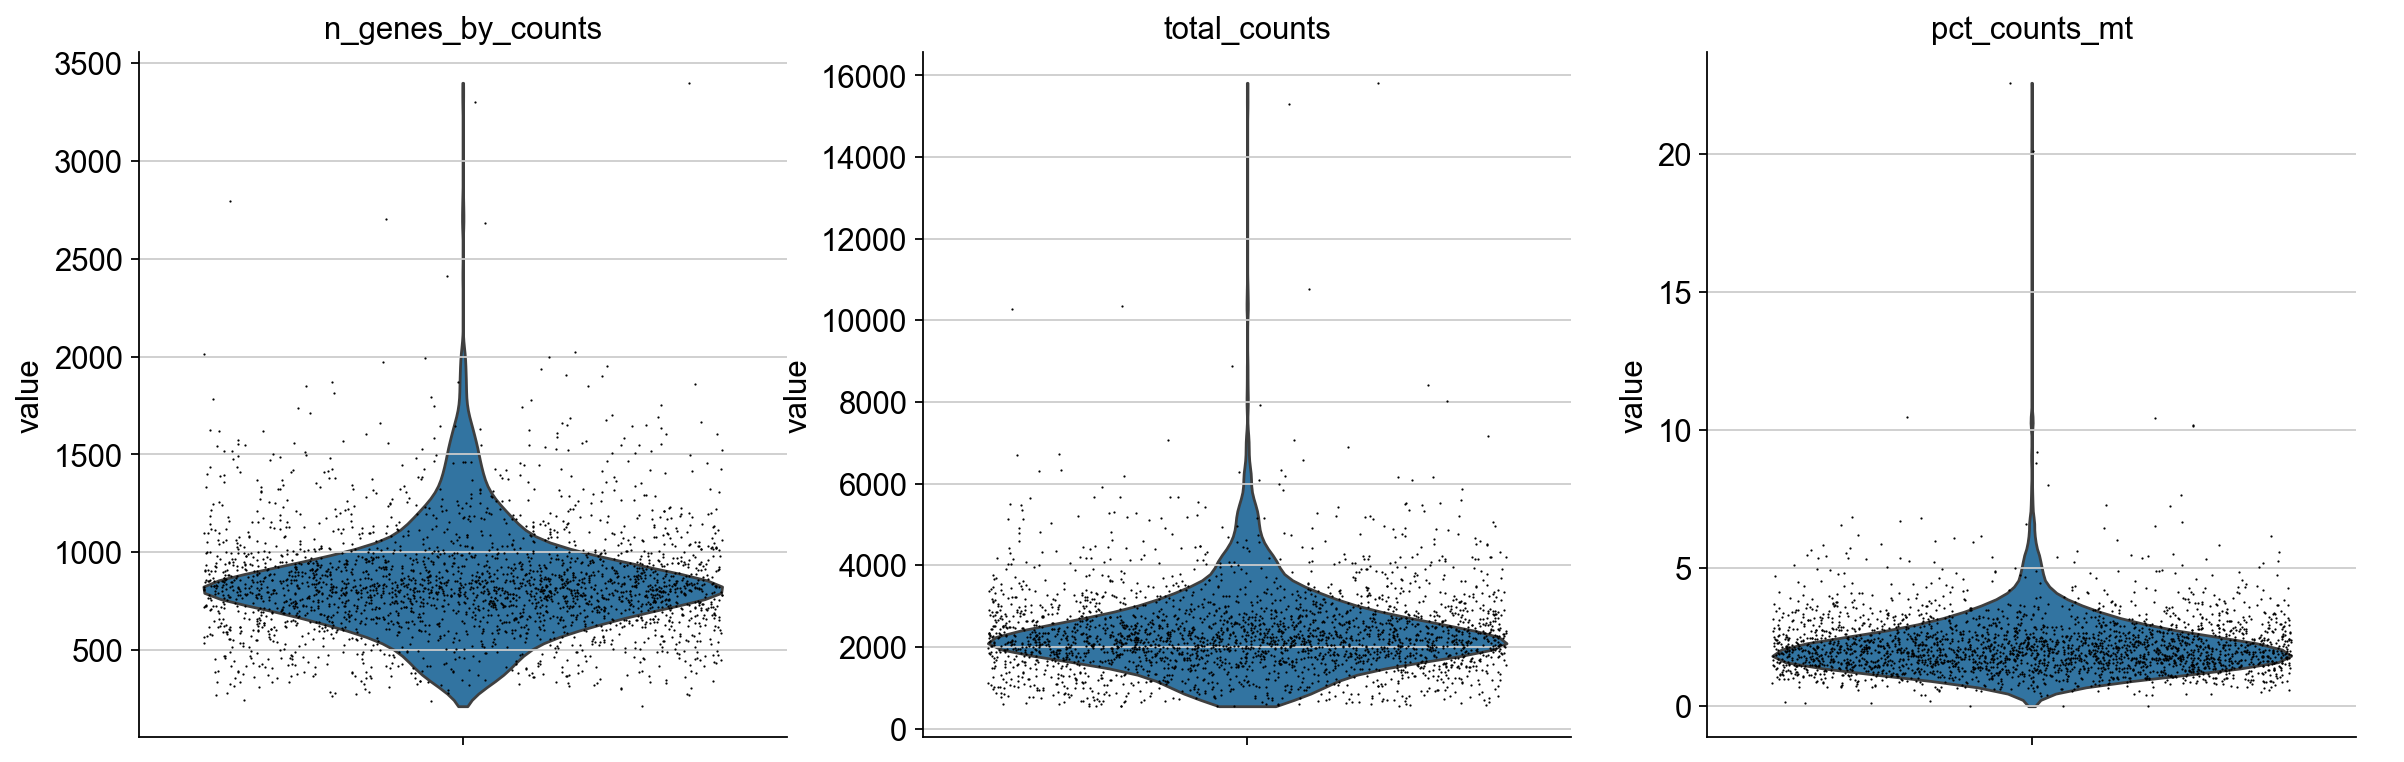

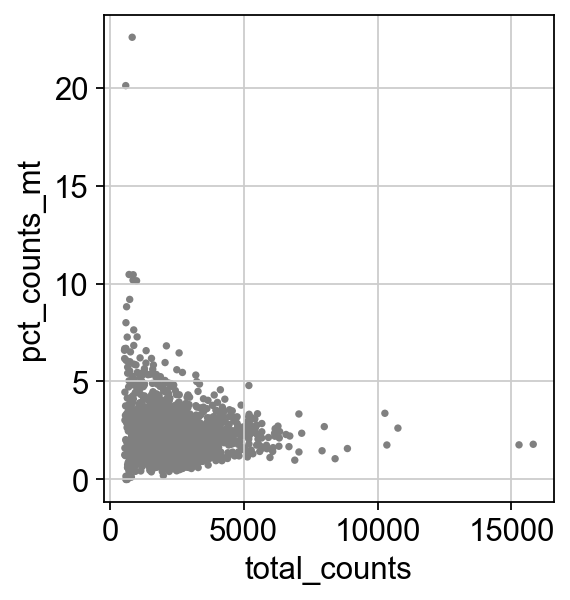

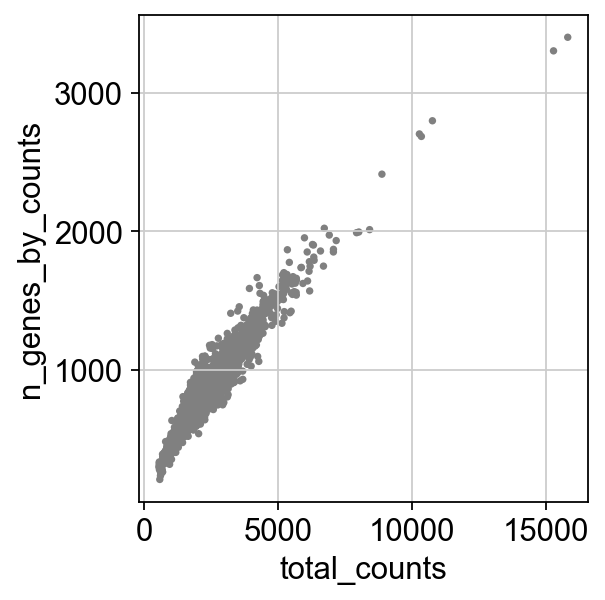

In [12]:
# mitochondrial genes are important for quality control - High proportions of them are indicative of poor-quality cells.

# annotate the group of mitochondrial genes as "mt"
adata.var["mt"] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt"], percent_top=None, log1p=False, inplace=True
)

sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

# filter out cells that have too many mitochondrial genes expressed or too many total counts
sc.pl.scatter(adata, x="total_counts", y="pct_counts_mt")
sc.pl.scatter(adata, x="total_counts", y="n_genes_by_counts")

adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :].copy()

normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


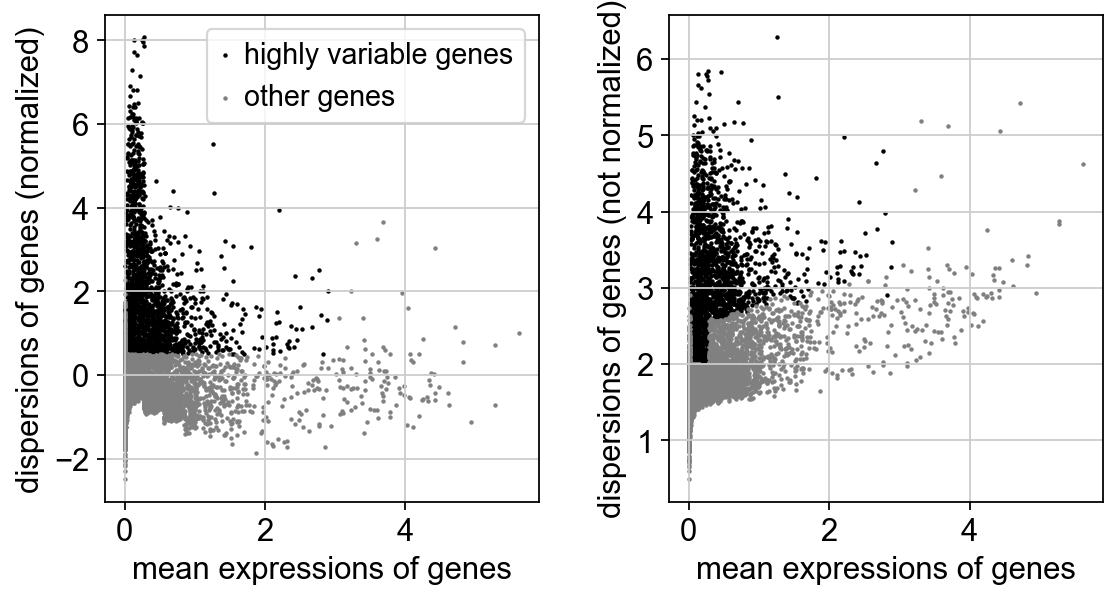

In [13]:
sc.pp.normalize_total(adata, target_sum=1e4) # normalize (library-size correct) the data matrix to 10,000 reads per cell, so that counts become comparable among cells.

sc.pp.log1p(adata) # log-transform the data

sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5) # Identify highly-variable genes.

sc.pl.highly_variable_genes(adata)

In [14]:
adata.raw = adata.copy() # freeze the state of the AnnData object for later use.

In [15]:
adata = adata[:, adata.var.highly_variable] # keep only the highly-variable genes to reduce noise and speed up computations.
sc.pp.regress_out(adata, ["total_counts", "pct_counts_mt"]) # Regress out unwanted sources of variations -  total counts per cell and the percentage of mitochondrial genes expressed.
sc.pp.scale(adata, max_value=10) # Scale each gene to unit variance. Clip values exceeding standard deviation 10.

regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:00:00)


c:\Users\ronmo\miniconda3\Lib\site-packages\scanpy\preprocessing\_simple.py:710: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


## PCA ##

Now we would want to reduce the dimensionality of the data by running PCA, which reveals the main axes of variation and denoises the data - capture most biological signal while discarding residual noise

computing PCA
    with n_comps=50
    finished (0:00:00)


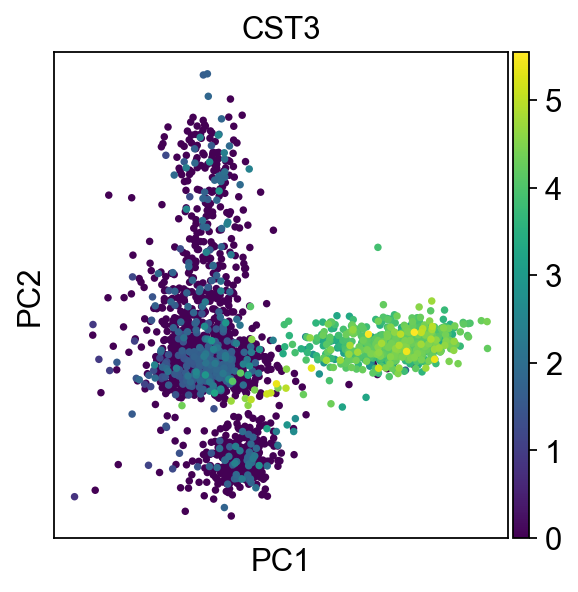

In [16]:
sc.tl.pca(adata, svd_solver="arpack")
sc.pl.pca(adata, color="CST3")

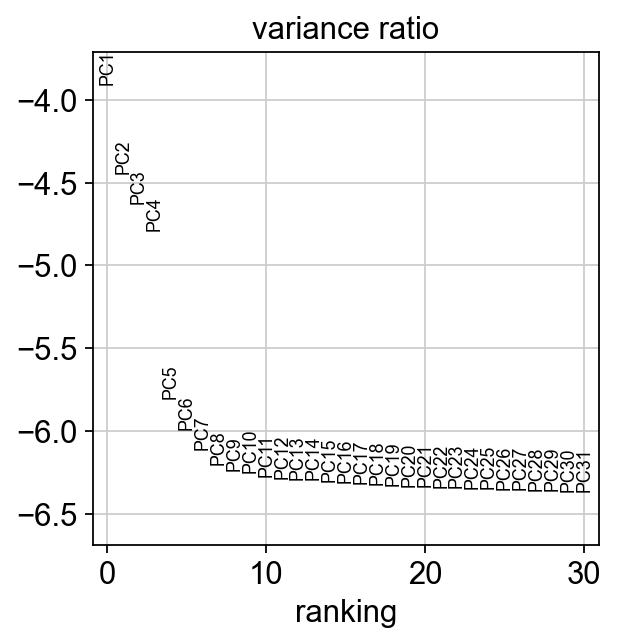

In [17]:
# Let us inspect the contribution of single PCs to the total variance in the data. 

# sc.pl.pca_variance_ratio(adata, log=False) # uncomment for real Proportion of total variance
sc.pl.pca_variance_ratio(adata, log=True)


In [18]:
adata

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [19]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40) # compute the neighborhood graph of cells using the PCA representation of the data matrix, so that downstream clustering and manifold-learning respect the true high-dimensional relationships without being overwhelmed by noise

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)


## tSNE ##

computing tSNE
    using sklearn.manifold.TSNE
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm)
    'tsne', tSNE parameters (adata.uns) (0:00:03)


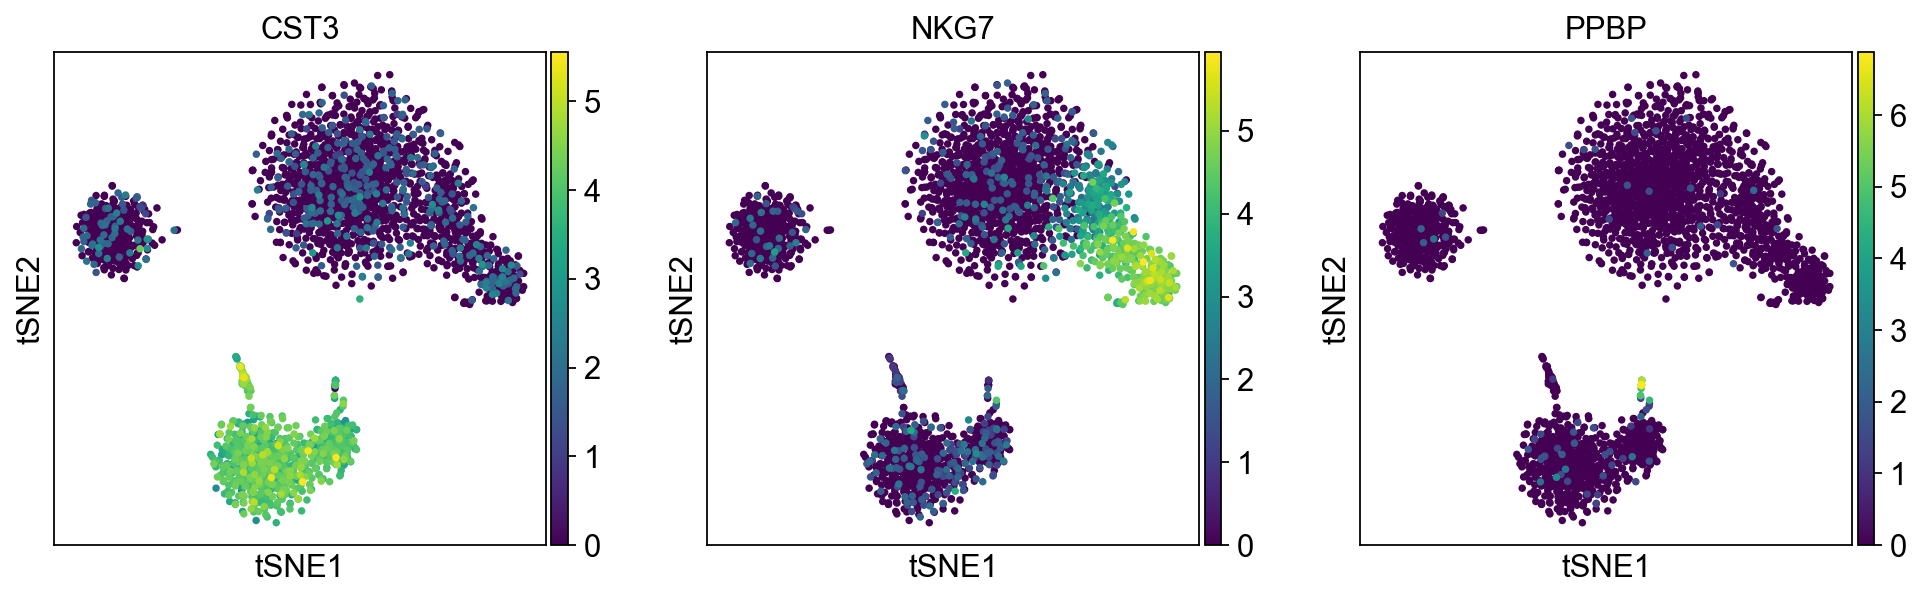

In [20]:
# Embedding - Produce an interpretable 2D layout that preserves both local neighborhoods and overall dataset topology, for visualization of cell populations
sc.tl.tsne(adata, use_rep="X_pca", n_pcs=40, perplexity=30)
sc.pl.tsne(adata, color=["CST3", "NKG7", "PPBP"])

## Clustering

In [21]:
sc.tl.leiden(
    adata,
    resolution=0.9,
    random_state=0,
    flavor="igraph",
    n_iterations=2,
    directed=False,
)

running Leiden clustering


Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 794, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 2881, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 794, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 2881, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 794, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 2881, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

    finished: found 8 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:52)


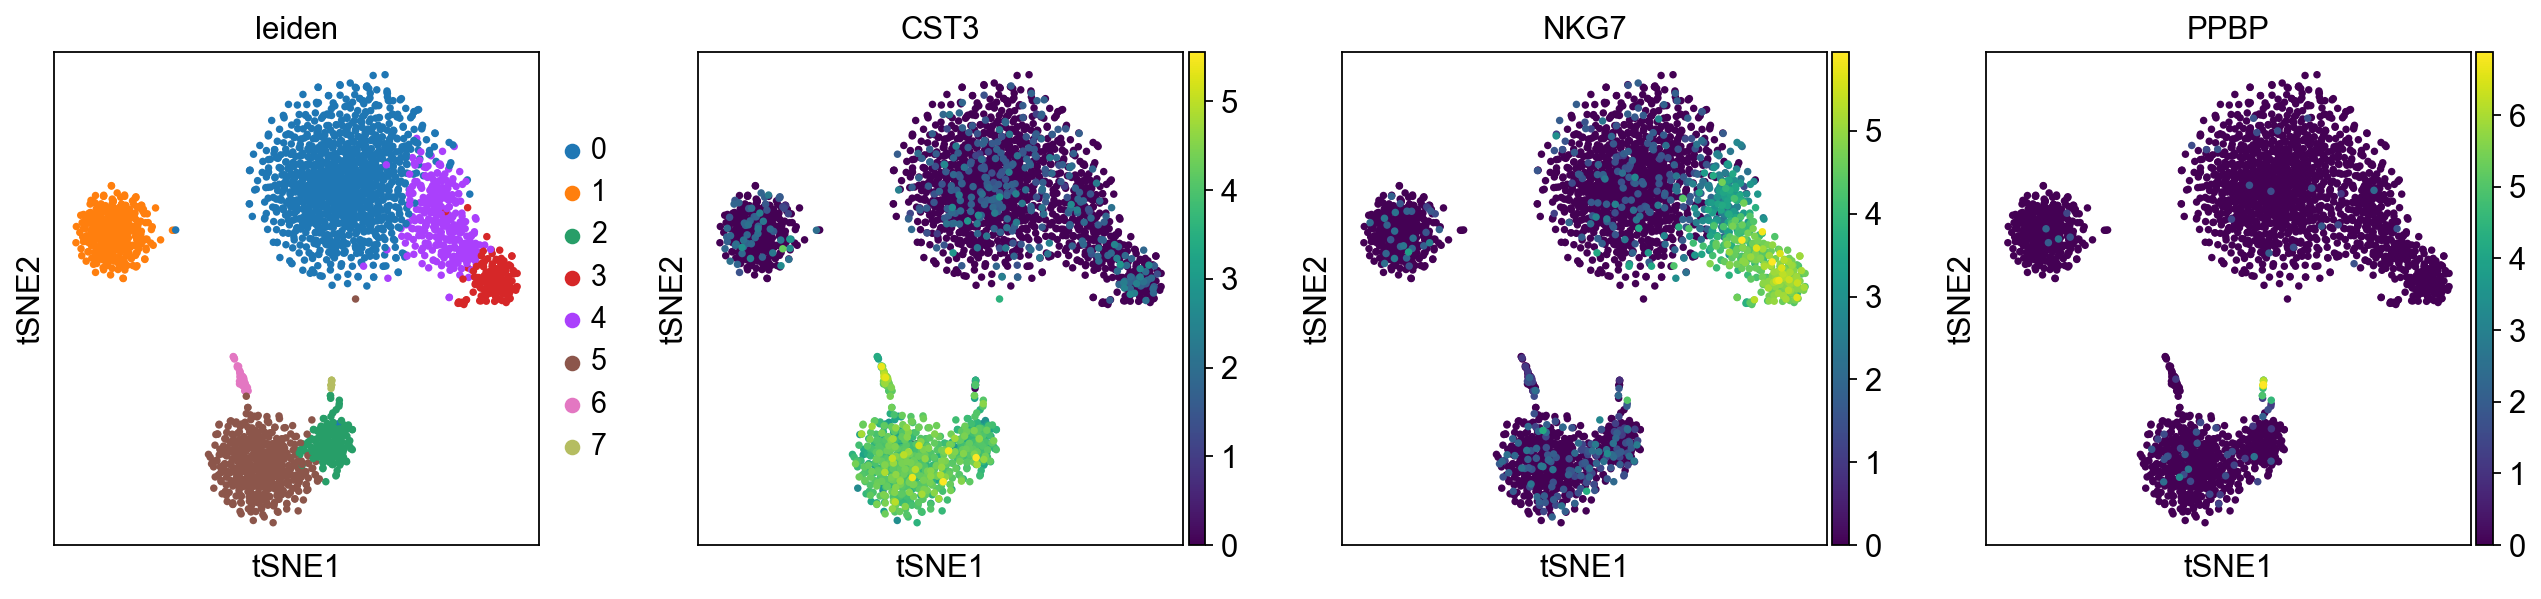

In [22]:
sc.pl.tsne(adata, color=["leiden", "CST3", "NKG7", "PPBP"])

ranking genes
    finished (0:00:00)


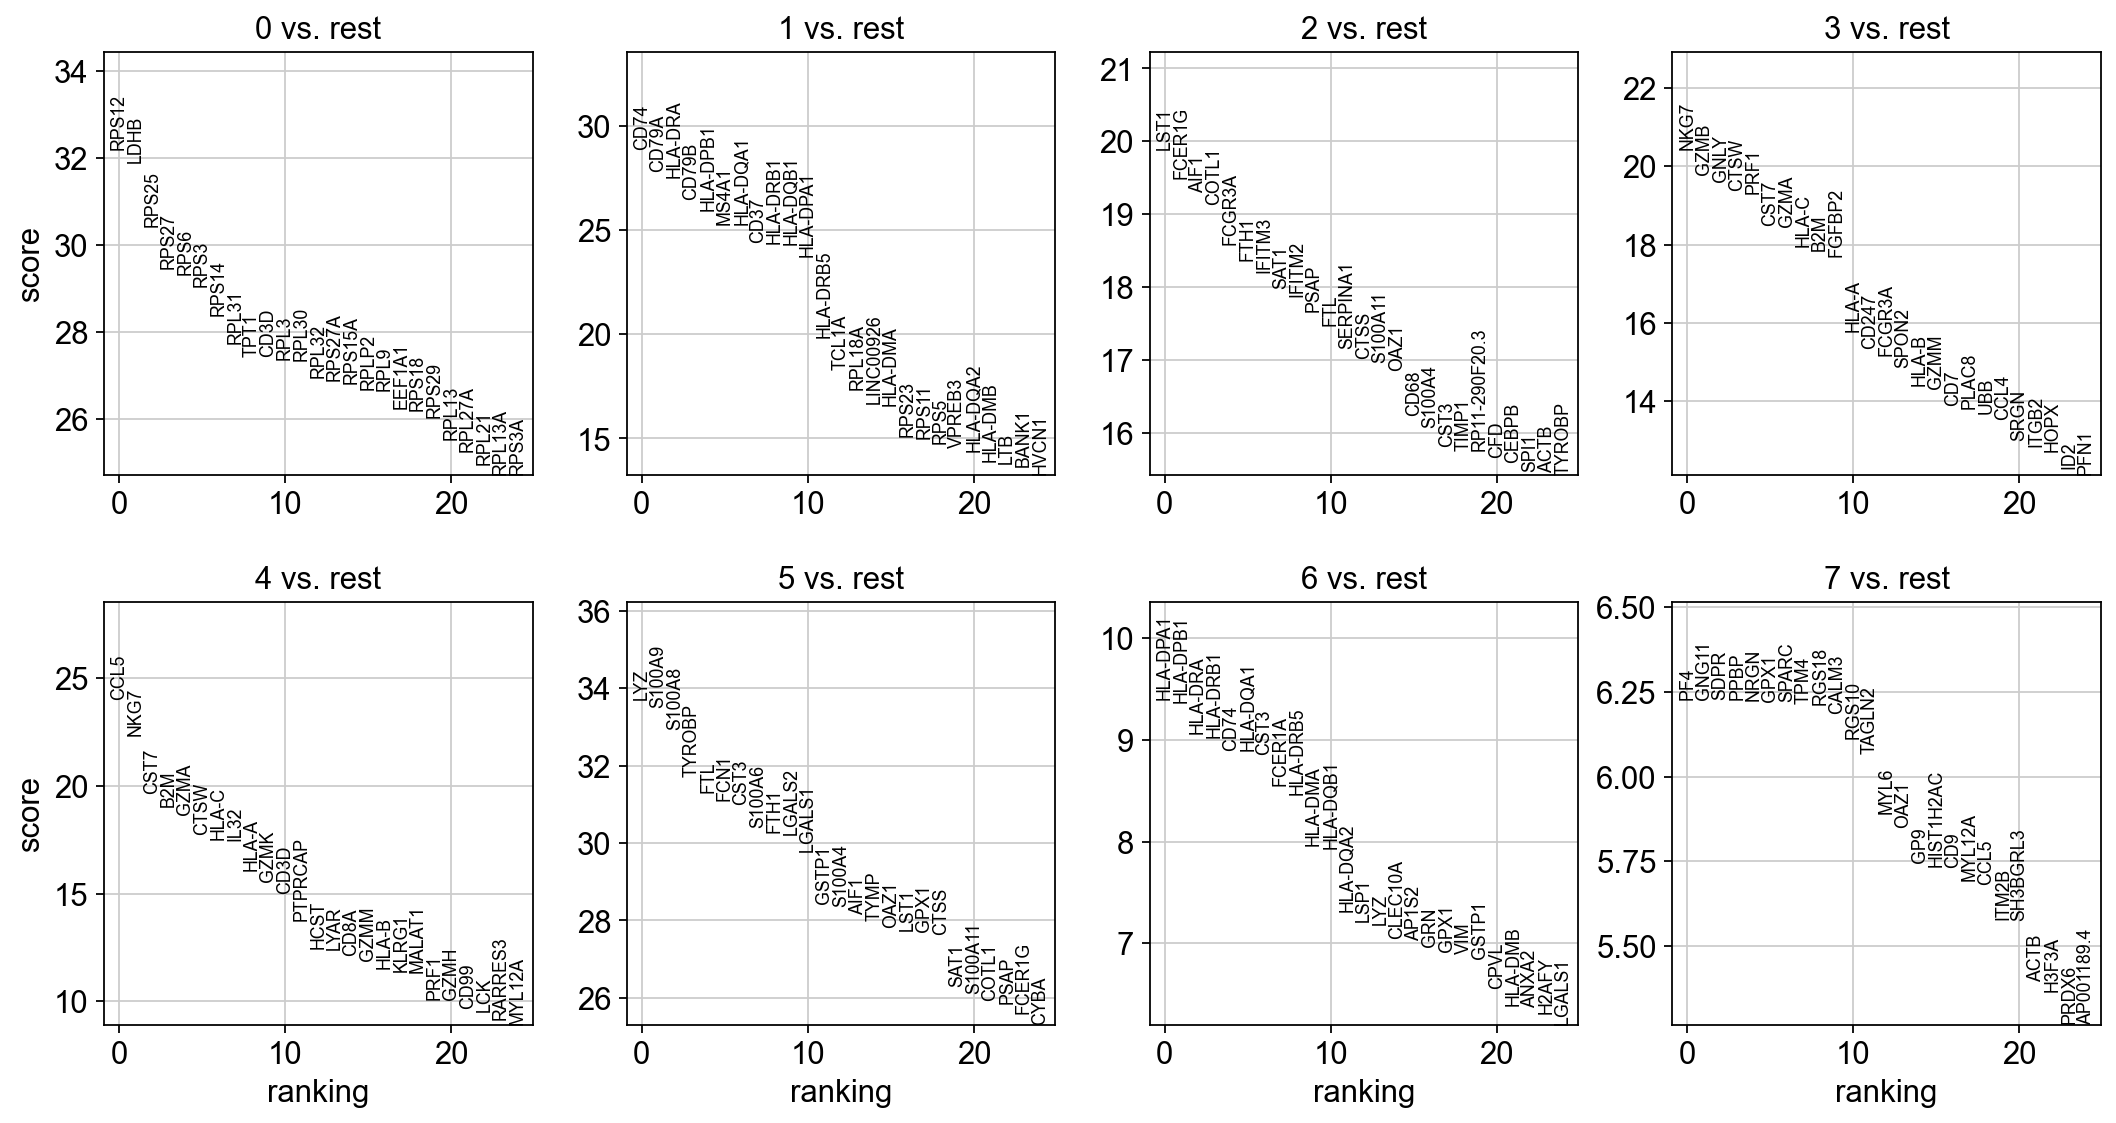

In [23]:
# rank gene expression in each cluster compared to all other clusters combined
sc.settings.verbosity = 2  # reduce the verbosity
sc.tl.rank_genes_groups(adata, "leiden", method="wilcoxon")
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [24]:
marker_genes = [
    *["IL7R", "CD79A", "MS4A1", "CD8A", "CD8B", "LYZ", "CD14"],
    *["LGALS3", "S100A8", "GNLY", "NKG7", "KLRB1"],
    *["FCGR3A", "MS4A7", "FCER1A", "CST3", "PPBP"],
] # list of marker genes for later reference

pd.DataFrame(adata.uns["rank_genes_groups"]["names"]).head(5) # top ranked genes per cluster

0         1       2     3     4       5         6      7
0  RPS12      CD74    LST1  NKG7  CCL5     LYZ  HLA-DPA1    PF4
1   LDHB     CD79A  FCER1G  GZMB  NKG7  S100A9  HLA-DPB1  GNG11
2  RPS25   HLA-DRA    AIF1  GNLY  CST7  S100A8   HLA-DRA   SDPR
3  RPS27     CD79B   COTL1  CTSW   B2M  TYROBP  HLA-DRB1   PPBP
4   RPS6  HLA-DPB1  FCGR3A  PRF1  GZMA     FTL      CD74   NRGN

Using prior biological knowledge, we can match the top ranked genes to known cell types 

In [25]:
marker_genes_dict = {
    "CD4 T": {"IL7R"},
    "B": {"CD79A","MS4A1"} ,
    "FCGR3A+ Monocytes": {"LYZ", "FCGR3A", "CST3", "MS4A7"},
    "NK": {"GNLY", "NKG7"},
    "CD8 T": {"NKG7", "CD8A"},
    "CD14+ Monocytes": {"LYZ", "S100A8","CST3", "CD14"},
    "Dendritic": {"LYZ",  "CST3", "FCER1A"},
    "Megakaryocytes": {"PPBP"},
}

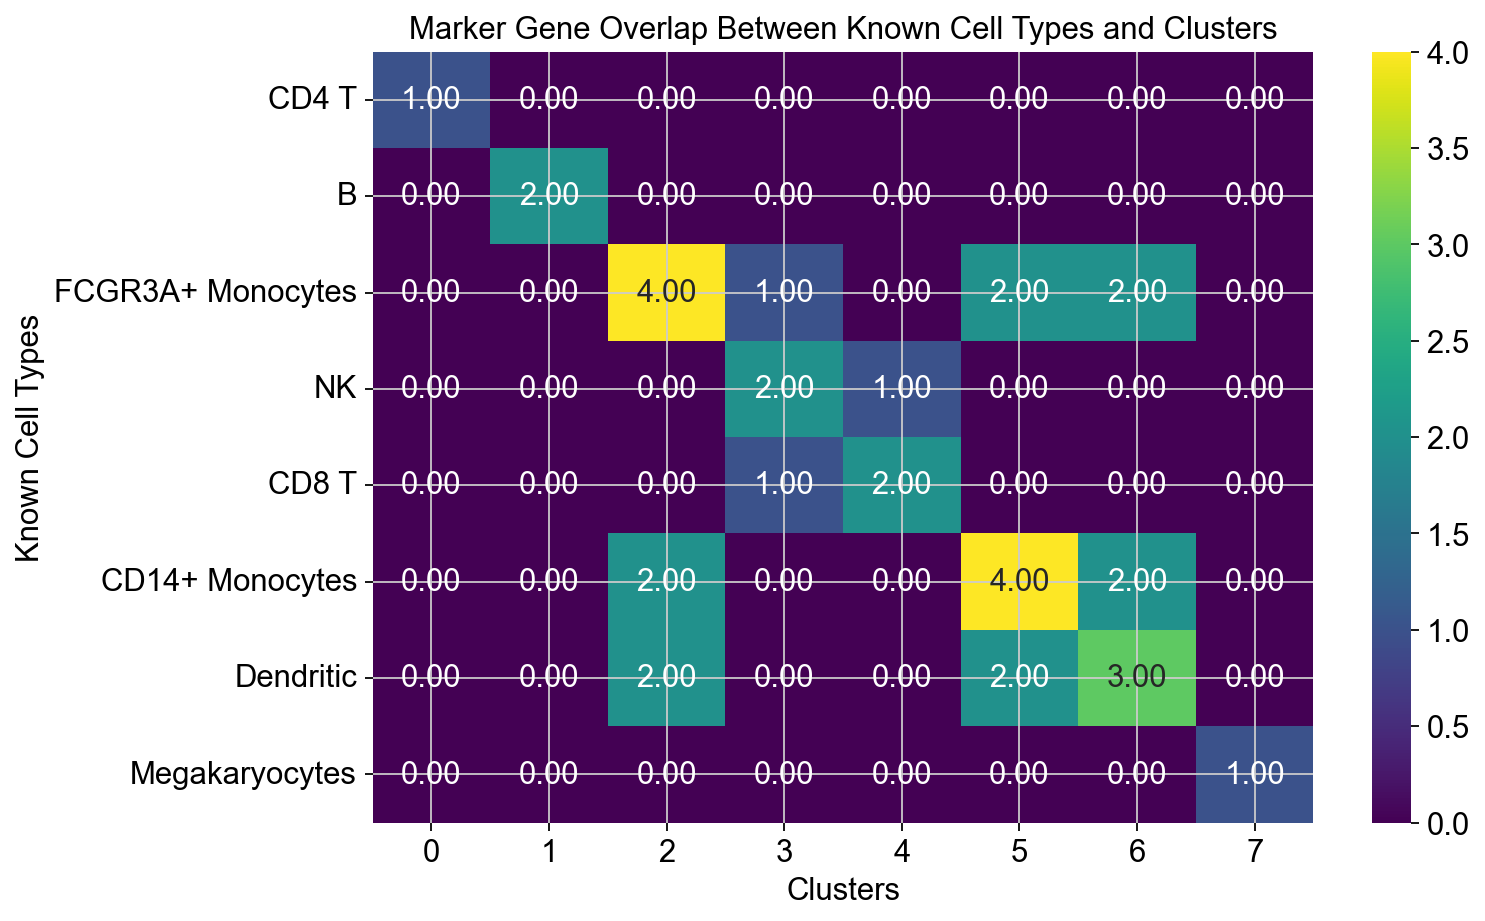

In [26]:
marker_matches  = sc.tl.marker_gene_overlap(adata, marker_genes_dict)

# plot the marker matches heatmap   

# Plot it
plt.figure(figsize=(10, 6))
sns.heatmap(marker_matches, annot=True, cmap="viridis", fmt=".2f")
plt.title("Marker Gene Overlap Between Known Cell Types and Clusters")
plt.xlabel("Clusters")
plt.ylabel("Known Cell Types")
plt.tight_layout()
plt.show()

In [27]:
marker_matches_T = marker_matches.T
# For each cluster, find the best-matching cell type
new_cluster_names = marker_matches_T.idxmax(axis=1).tolist()
adata.rename_categories("leiden", new_cluster_names) # mark the cell types

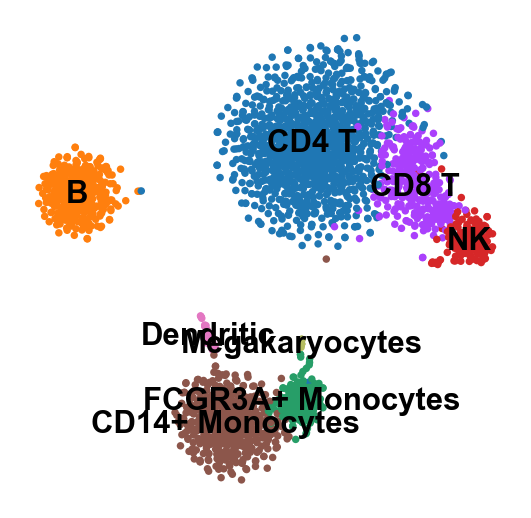

In [28]:
sc.pl.tsne(
    adata, color="leiden", legend_loc="on data", title="", frameon=False, save=".pdf"
)

<div dir=rtl>
    אז בעצם ראינו פה איך ניתן לקחת דאטא ממימד גבוה ביותר (שלא ידענו איך לגזור ממנו יותר מידי משמעויות ישירות) שמתאר לי ביטוי גנים בכל מיני צורות, 
    </br>
    ולהשתמש בהורדת מימדים לצורך ניקוי רעש ועבודה רק עם החלקים הכי משמעותיים של הדאטא, והטלה שלו לדו מימד
    </br>
    יכולנו לבצע clustring, ולאפיין בצורה מלאה את התאים שלנו לקבוצות התאים השונות.
</div>